# Auto-ARIMA

This is a version of 'PH_avg_temp' using auto-arima.

In [1]:
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd
import pickle

c:\users\neo\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\users\neo\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
data = pd.read_csv('ph_tas.csv')
data.head()

,Temperature - (Celsius),Year,Month,Country,ISO3
0,25.5699,1901,Jan,Philippines,PHL
1,24.1451,1901,Feb,Philippines,PHL
2,25.4436,1901,Mar,Philippines,PHL
3,27.0414,1901,Apr,Philippines,PHL
4,27.4015,1901,May,Philippines,PHL


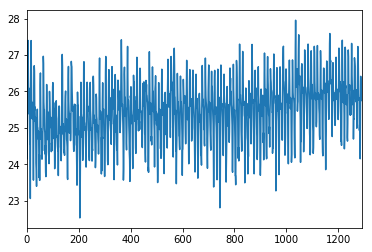

In [4]:
data_play = data['Temperature - (Celsius)']
tempr_data = data_play[:-100]
tempr_data.plot()

In [5]:
input = tempr_data.values

In [11]:
tempr_arima = pm.auto_arima(input, max_p=8, max_d=1,
                            max_q=8, m=12,
                            seasonal=True,
                             D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True,
                             stepwise=True)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 1, 1, 12); AIC=932.995, BIC=974.232, Fit time=32.211 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=2040.423, BIC=2050.732, Fit time=0.650 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1407.775, BIC=1428.393, Fit time=5.045 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1151.141, BIC=1171.759, Fit time=8.205 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 1, 1, 12); AIC=933.989, BIC=970.072, Fit time=27.184 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 1, 1, 12); AIC=931.566, BIC=977.958, Fit time=70.345 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 1, 0, 12); AIC=1216.973, BIC=1258.210, Fit time=40.874 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 1, 2, 12); AIC=936.038, BIC=987.584, Fit time=89.840 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 1, 0, 12); AIC=1360.000, BIC=1396.082, Fit time=15.234 seconds
Fit ARIMA: order=(1, 0, 2) sea

In [13]:
tempr_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1292
Model:             SARIMAX(3, 0, 2)x(2, 1, 1, 12)   Log Likelihood                -454.451
Date:                            Fri, 07 Jun 2019   AIC                            928.902
Time:                                    11:38:12   BIC                            980.448
Sample:                                         0   HQIC                           948.257
                                           - 1292                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.001      1.625      0.104      -0.000       0.003
ar.L1          0.4733      0.357      1.325      0.185      -0.227       1.173
ar.L2          0.4940      0.272      1.815      0.070      -0.039       1.027
ar.L3         -0.1399      0.067     -2.091      0.037      -0.271      -0.009
ma.L1         -0.0809      0.358     -0.226      0.821      -0.783       0.621
ma.L2         -0.3425      0.161     -2.124      0.034      -0.659      -0.026
ar.S.L12       0.0416      0.030      1.408      0.159      -0.016       0.100
ar.S.L24      -0.0549      0.029     -1.908      0.056      -0.111       0.001
ma.S.L12      -0.9428      0.012    -81.533      0.000      -0.965      -0.920
sigma2         0.1166      0.004     28.705      0.000       0.109       0.125
===================================================================================
Ljung-Box (Q):                       26.59   Jarque-Bera (JB):                31.56
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.18
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
preds = tempr_arima.predict(n_periods=12)
preds

array([25.750362  , 25.75437309, 25.41948322, 24.8998884 , 24.68543124,
       24.75966567, 25.64259128, 26.64628879, 26.93957458, 26.46936641,
       26.08097762, 25.99830331])

In [15]:
temp_series = np.array(data_play[-100:-76])

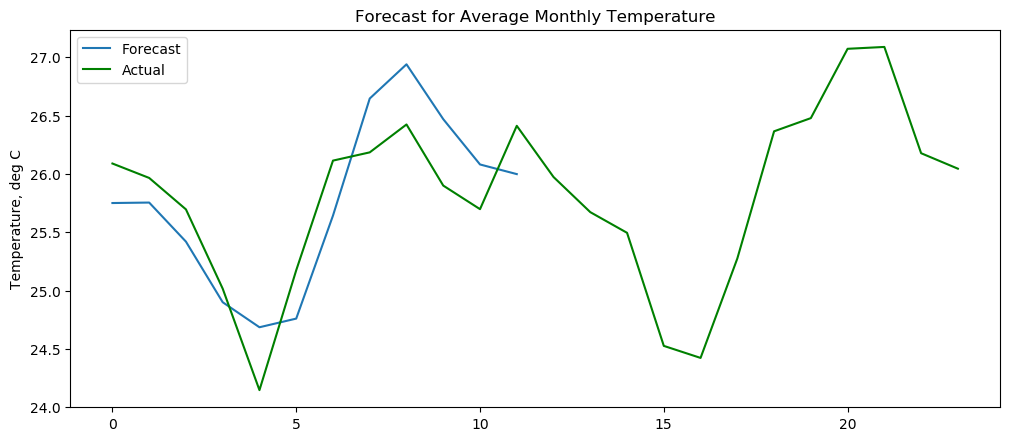

In [17]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(preds, label='Forecast')
plt.plot(temp_series, color='green', label='Actual')
plt.title('Forecast for Average Monthly Temperature')
plt.legend(loc='upper left')
plt.ylabel('Temperature, deg C')
plt.show()

For 'saving' and 'loading' the model

In [ ]:
with open('tempr_arima.pkl','wb') as tempr_file:
    pickle.dump(tempr_arima, tempr_file)

In [ ]:
with open('tempr_arima.pkl', 'rb') as arima_pred:
    preds = pickle.load(arima_pred).predict(n_periods=10)
    for pred in preds:
        print(pred)